In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [9]:
# Importing the dataset
dataset = pd.read_csv('car_details.csv')

In [10]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,1,"""ford torino"""


In [12]:
dataset.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car_name        0
dtype: int64

In [14]:
 dataset.mean()

mpg               23.514573
cylinders          5.475369
displacement     194.779557
horsepower       105.082500
weight          2979.413793
acceleration      15.519704
model year        75.921182
origin             1.568966
dtype: float64

In [62]:
dataset.fillna(dataset.mean(),inplace=True)
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,1,"""ford torino"""


In [18]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car_name        0
dtype: int64

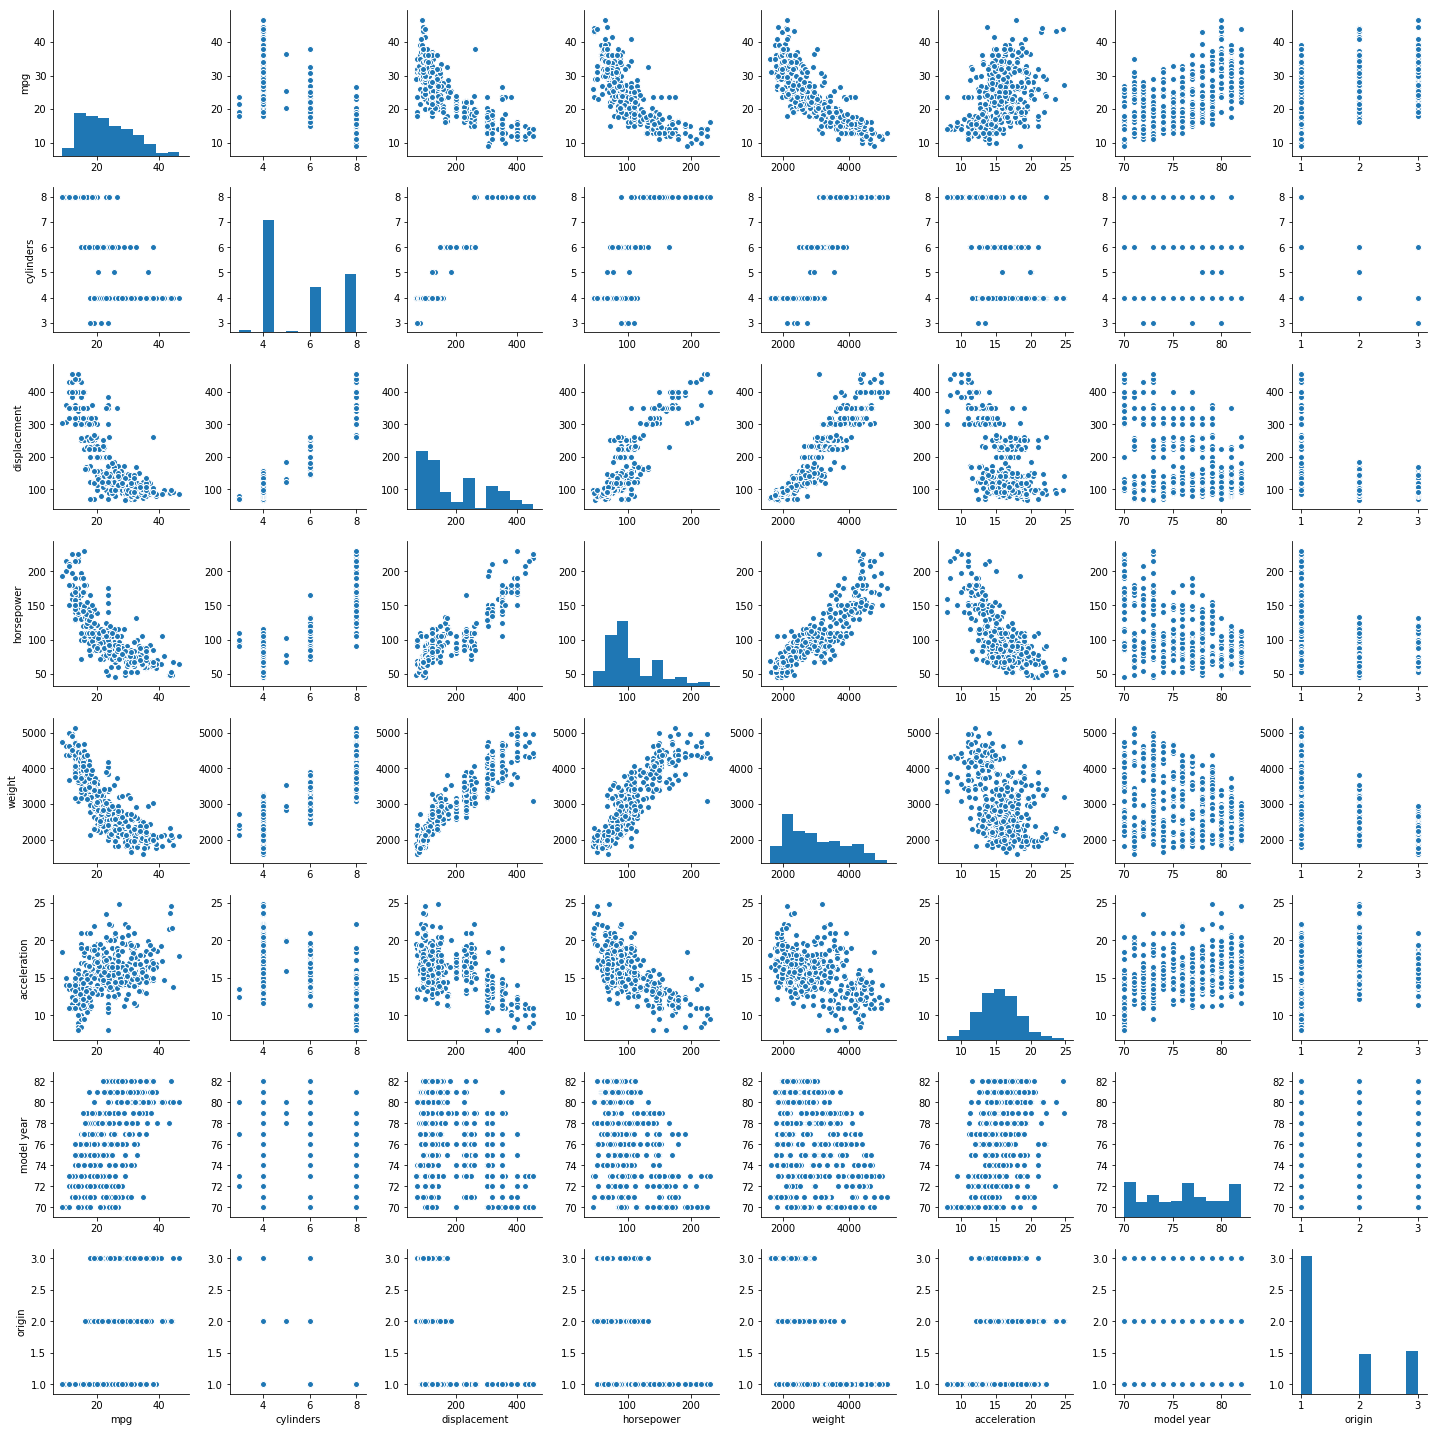

In [34]:
sns.pairplot(dataset)

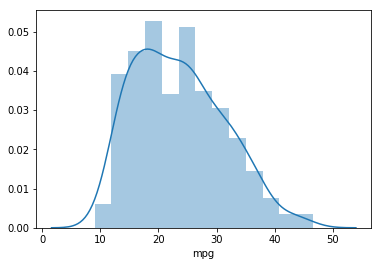

In [35]:
sns.distplot(dataset['mpg'])

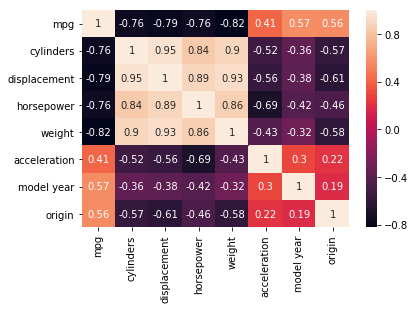

In [38]:
sns.heatmap(dataset.corr(),annot=True)

In [43]:
X = dataset[['cylinders','displacement','horsepower','weight','acceleration','model year','origin']]
y = dataset['mpg']

In [63]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [64]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print(regressor.intercept_)

-11.227973353


In [49]:
col_coeffs = pd.DataFrame(regressor.coef_,X.columns,columns=['coefficient'])

In [50]:
col_coeffs

,coefficient
cylinders,-0.443151
displacement,0.016531
horsepower,-0.019386
weight,-0.006217
acceleration,0.007801
model year,0.689137
origin,1.176335


In [51]:
y_pred = regressor.predict(X_test)

In [52]:
y_pred

array([ 24.29119492,  15.54116046,  28.49551667,  15.35130216,
        22.27026333,  19.49299999,  30.5583764 ,  15.60057803,
        31.9680222 ,   9.17325699,  35.75036617,  26.55359807,
        30.37249642,  32.02692156,  12.48379361,  19.87104558,
        24.76891438,  27.45616372,  33.39594718,  24.52531643,
        32.84186451,  17.43845389,  17.63472521,  17.97688115,
        20.68369576,  21.63144916,  32.83547496,  19.79057358,
        15.6038155 ,  23.68652597,  17.10429935,  27.75136522,
        22.9406283 ,  10.36101588,  25.74030681,  11.10559236,
        31.60428711,  31.4142993 ,  22.87857414,  18.12377243,
        30.08021254,  21.30756032,  26.98759841,  28.04531326,
        10.88243462,  14.35866865,  30.89272996,  20.53872065,
        25.53637293,  30.82689784,  11.17469631,  25.11861889,
        22.81023456,  28.37750215,  10.96604241,  12.82901741,
        23.26516124,  30.50973838,  14.40692749,  20.04002855,
        18.48563057,  21.2471042 ,  11.84352407,  25.48

In [54]:
y_test

175    23.000000
239    16.000000
60     31.000000
231    15.000000
134    19.000000
299    18.500000
240    29.000000
238    15.500000
360    33.000000
102    12.000000
350    39.100000
330    27.900000
341    23.700000
328    32.200000
12     23.514573
135    15.000000
65     25.000000
179    25.000000
319    37.200000
90     28.000000
329    46.600000
272    17.500000
142    18.000000
141    16.000000
159    19.000000
263    20.500000
331    40.800000
295    18.200000
15     15.000000
371    22.400000
         ...    
200    24.000000
124    29.000000
146    14.000000
100    14.000000
287    21.500000
318    32.100000
122    15.000000
52     18.000000
10     23.514573
26     25.000000
45     14.000000
78     19.000000
300    31.900000
4      17.000000
206    20.000000
399    36.000000
347    25.800000
354    37.000000
5      15.000000
339    29.800000
171    21.000000
395    38.000000
7      14.000000
22     18.000000
68     21.000000
20     24.000000
220    13.000000
14     23.5145

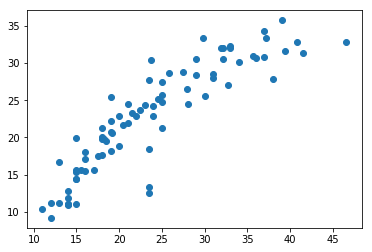

In [56]:
plt.scatter(y_test,y_pred)

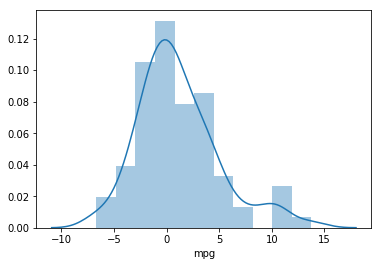

In [59]:
sns.distplot(y_test-y_pred)

In [61]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.0137236626733008